In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import constants

In [144]:
redled_voltages = pd.read_csv('data/voltage/redled.csv')
yellowled_voltages = pd.read_csv('data/voltage/yellowled.csv')
greenled_voltages = pd.read_csv('data/voltage/greenled.csv')
blueled_voltages = pd.read_csv('data/voltage/blueled.csv')

greenled_voltages

,PowerSupply voltage,Gemeten Voltage,Gemeten Ampere,Verschil in Ampere,LED voltage
0,1.8,5,2,NaN,1.80
1,1.9,7,3,1.0,1.89
2,2.0,7,3,0.0,1.99
3,2.1,7,3,0.0,2.09
4,2.2,15,7,4.0,2.19
...,...,...,...,...,...
60,7.8,4657,2117,40.0,3.14
61,7.9,4749,2160,43.0,3.15
62,8.0,4840,2200,40.0,3.16
63,8.1,4926,2240,40.0,3.17


In [145]:
voltages = []
def error(data_volt):
    error_ledvoltage = []
    for i in range(len(data_volt['LED voltage'])):
    # formule = afgeleide
        # error_v = np.sqrt((0.003/220)**2 + (-data_volt['LED voltage'][i] * 5 / 220**2)**2)
        # error_ledvoltage.append(0.06)
        error_v = np.sqrt(0.003**2 + (data_volt['Gemeten Ampere'][i]/100000*2)**2)
        error_ledvoltage.append(error_v)
    return error_ledvoltage

def eerstegraad(x, a, b):
    return a*x+b
     
def fit (data_volt):
    verschil = np.array(data_volt['Verschil in Ampere'])[-2] - 1

    # vind de stabiele punt
    for _ in range(len(data_volt['Verschil in Ampere'])):
        if data_volt['Verschil in Ampere'][_] > verschil:
            stabiel = _
            break

    # m, q = np.polyfit(data_volt['LED voltage'][stabiel:], data_volt['Gemeten Ampere'][stabiel:]/1000, 1)
    # --------------------------------------------------------------------------------------------------------
    popt, pcov = curve_fit(eerstegraad, data_volt['LED voltage'][stabiel:], data_volt['Gemeten Ampere'][stabiel:]/1000)
    fout = np.sqrt(np.diag(pcov))

    m = popt[0]; q = popt[1]
    # --------------------------------------------------------------------------------------------------------
    

    # vind de nulpunt en waar de nulpunt voorkomt
    nulpunt = [round(-q / m, 3)]
    voltages.append(nulpunt)
    # vind de onzekerheid op de nulpunt
    onzekerheid = np.sqrt((fout[0]**2/m**2)+(fout[1]**2/q**2)) * nulpunt[0]
    nulpunt.append(round(onzekerheid, 2))
    
    index = data_volt['LED voltage'][round(data_volt['LED voltage'], 1) == round(nulpunt[0], 1)]
    return m, q, nulpunt, index.index[0], stabiel, fout



def grafiek(data_volt, kleur, min_index, m, q, errors, nulpunt):
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Eereste graads fit 
    x = np.linspace(data_volt['LED voltage'][min_index], np.array(data_volt['LED voltage'])[-1], 100)
    y = eerstegraad(x, m, q)
    ax.plot(x, y, label='Eerste Graad fit')

    # data
    ax.errorbar(
        data_volt['LED voltage'],
        data_volt['Gemeten Ampere']/1000,
        yerr=errors,
        linestyle='',
        color='black',
        ecolor='black',
        marker="o",
        markersize=5,
        capsize=1,
        capthick=1.6,
        linewidth=1.6,
        label=f'{kleur} LED'
    )

    # nulpunt
    plt.axvline(nulpunt[0], color="red", linestyle="--", label=f'{kleur} LED Minimum Spanning: {round(nulpunt[0], 2)} +- {round(nulpunt[1], 3)}V')
    
    plt.title(r'Stroom (mI) in Functie van de Spanning (V)')
    ax.set_xlabel('Spanning (V)')
    ax.set_ylabel(r'Stroon (mI)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'PPT/{kleur}.png')
    plt.show()

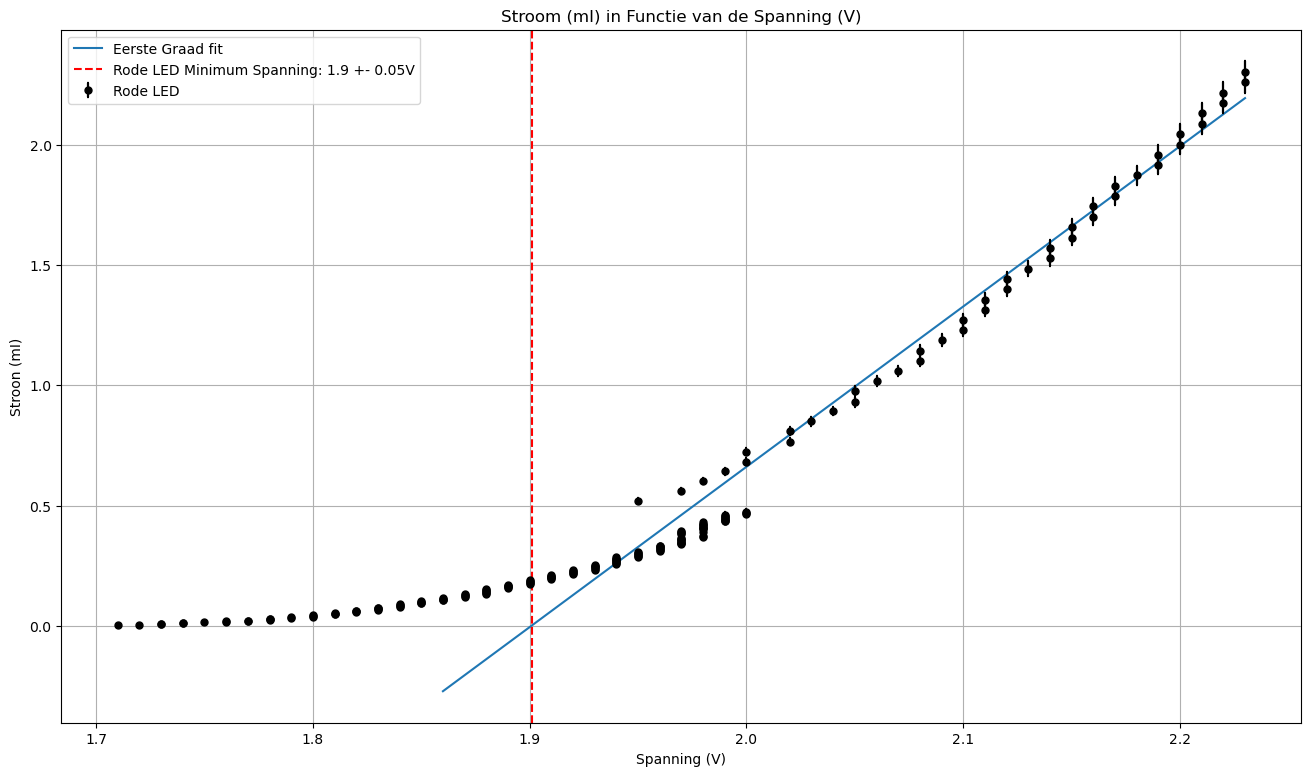

In [146]:
# Rode LED
error_redled = error(redled_voltages)
redled_m, redled_q, redled_minimum, redled_min_index,  redled_stabiel, redled_fout = fit(redled_voltages)
grafiek(redled_voltages, 'Rode', redled_min_index, redled_m, redled_q, error_redled, redled_minimum)

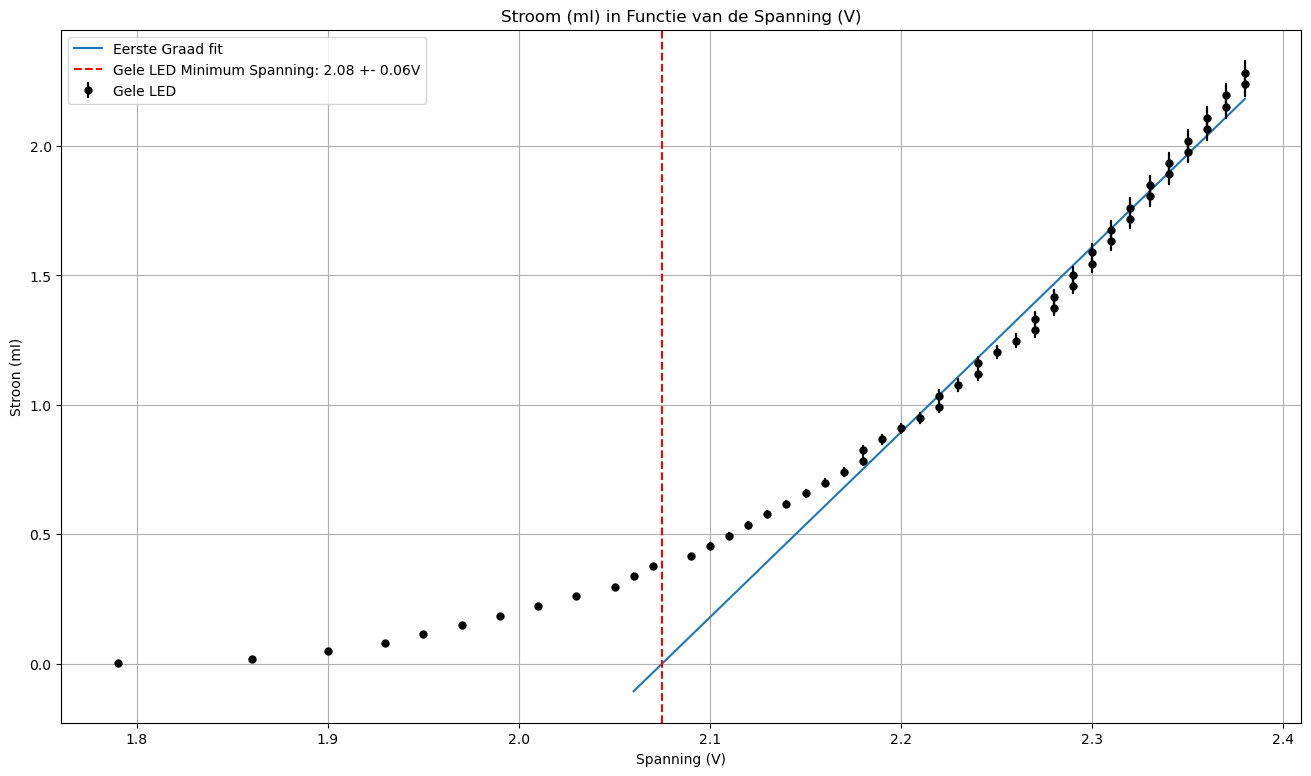

In [147]:
# Gele LED
error_yellowled = error(yellowled_voltages)
yellowled_m, yellowled_q, yellowled_minimum, yellowled_min_index, yellowled_stabiel, yellowled_fout = fit(yellowled_voltages)
grafiek(yellowled_voltages, 'Gele', yellowled_min_index, yellowled_m, yellowled_q, error_yellowled, yellowled_minimum)

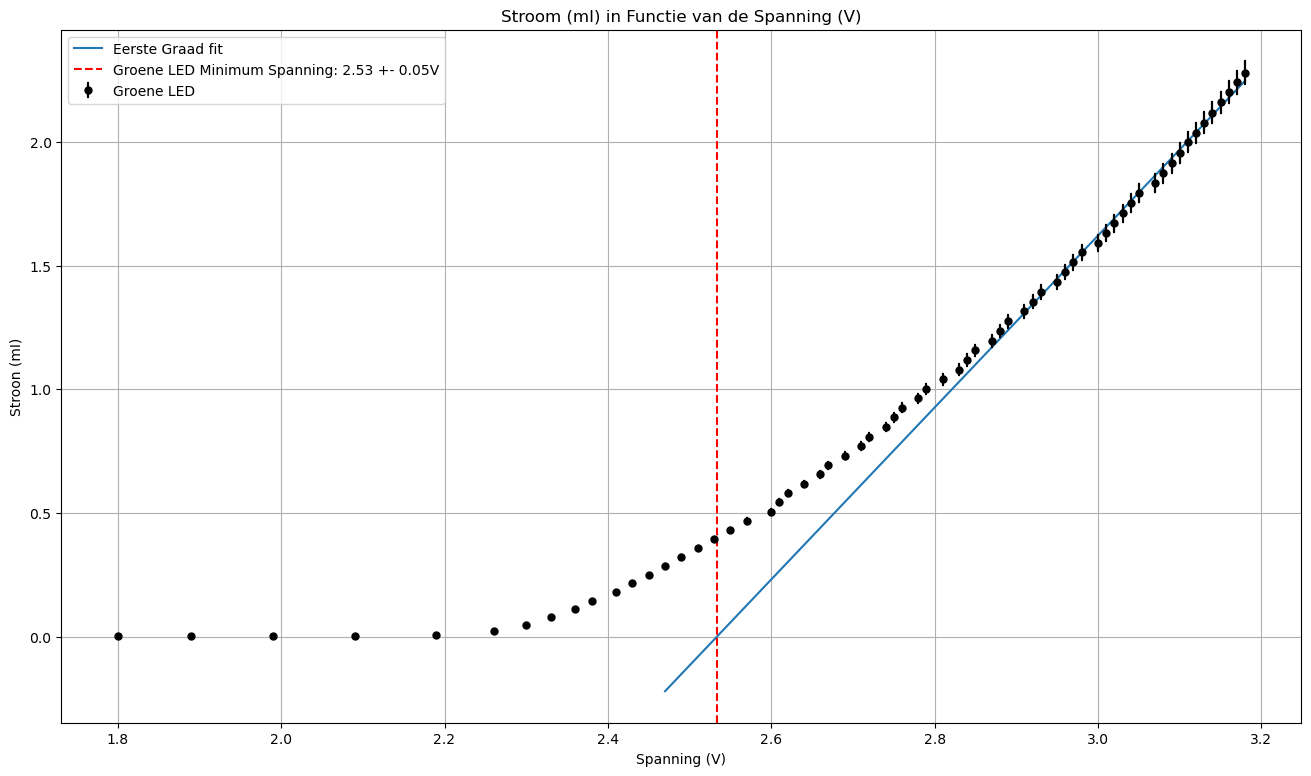

In [148]:
# Groene LED
error_greenled = error(greenled_voltages)
greenled_m, greenled_q, greenled_minimum, greenled_min_index, greenled_stabiel, greenled_fout = fit(greenled_voltages)
grafiek(greenled_voltages, 'Groene', greenled_min_index, greenled_m, greenled_q, error_greenled, greenled_minimum)

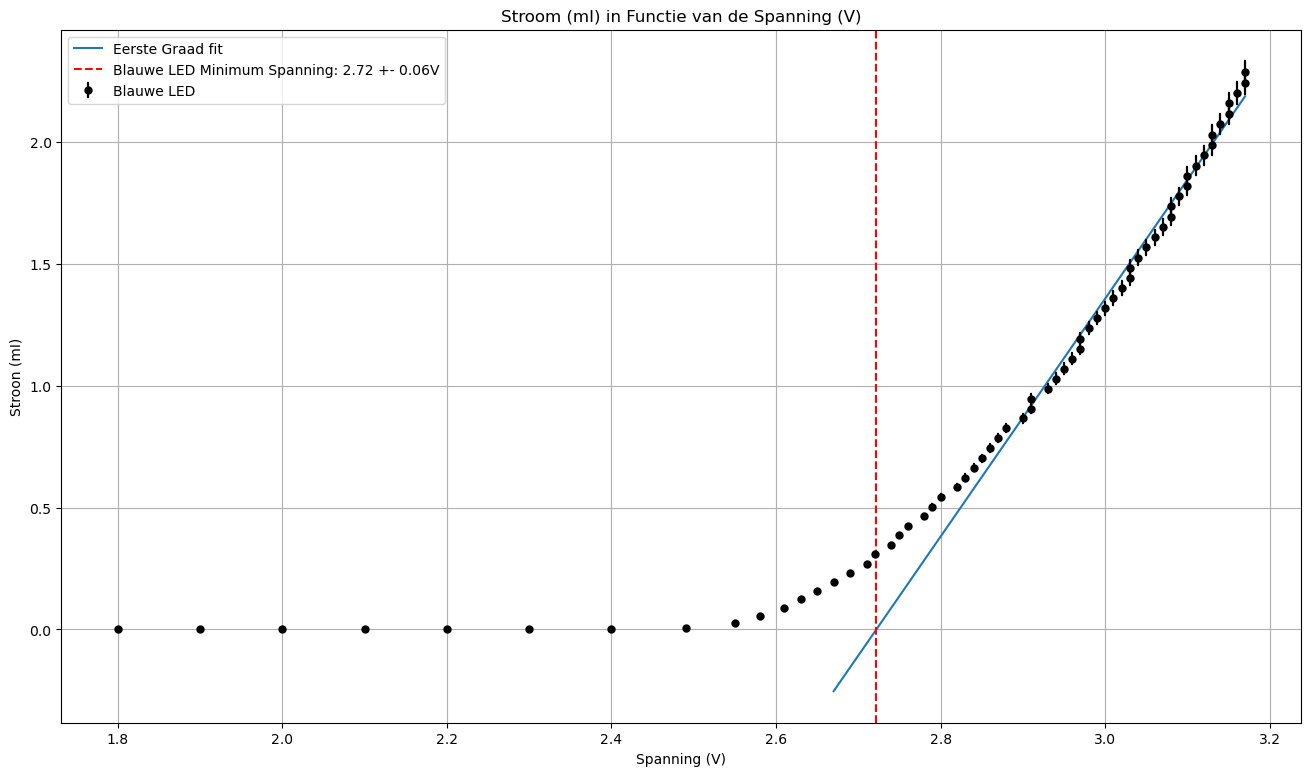

In [149]:
# Blauwe LED
error_blueled = error(blueled_voltages)
blueled_m, blueled_q, blueled_minimum, blueled_min_index, blueled_stabiel, blueled_fout = fit(blueled_voltages)
grafiek(blueled_voltages, 'Blauwe', blueled_min_index, blueled_m, blueled_q, error_blueled, blueled_minimum)

In [150]:
redled_lambda = pd.read_csv('data/golflengte/red.txt', sep='\t', decimal=',', names=['golflengte', 'intensiteit'], skiprows=1)
yellowled_lambda = pd.read_csv('data/golflengte/yellow.txt', sep='\t', decimal=',', names=['golflengte', 'intensiteit'], skiprows=1)
greenled_lambda = pd.read_csv('data/golflengte/green.txt', sep='\t', decimal=',', names=['golflengte', 'intensiteit'], skiprows=1)
blueled_lambda = pd.read_csv('data/golflengte/blue.txt', sep='\t', decimal=',', names=['golflengte', 'intensiteit'], skiprows=1)

redled_lambda

,golflengte,intensiteit
0,338.317,1502.0
1,338.772,1500.2
2,339.228,1497.2
3,339.683,1501.2
4,340.139,1502.4
...,...,...
1018,822.164,1501.5
1019,822.657,1501.6
1020,823.150,1500.3
1021,823.643,1502.2


In [179]:
lambdas = []
def led_golflengte(data_lambda):
    # bepaal de peaken
    peak = data_lambda['intensiteit'].idxmax()
    lambda_peak = data_lambda.loc[peak, 'golflengte']
    intensiteit_peak = data_lambda.loc[peak, 'intensiteit']

    # neem de grootste helling aan de linkerkant (tangent methode)
    data_links = data_lambda.iloc[:peak].copy()
    data_links['helling'] = np.gradient(data_links['intensiteit'], data_links['golflengte'])

    # zoek de sterkste helling
    steilste = data_links['helling'].idxmax()
    x0 = data_links.loc[steilste, 'golflengte']
    y0 = data_links.loc[steilste, 'intensiteit']
    m = data_links.loc[steilste, 'helling']

    # corrigeer de data aan (ongeveer 1500 zie data)
    correctie = data_lambda['intensiteit'].iloc[:10].mean()

    # bereken de nulpunt
    juiste_lambda = x0 - (y0 - correctie) / m
    lambdas.append(juiste_lambda)

    return round(lambda_peak, 1), round(juiste_lambda, 1), x0, y0, m, correctie

def grafiek_lambda(data_lambda, kleur, couleur, juiste_lambda, x0, y0, m, correctie):
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(data_lambda['golflengte'], data_lambda['intensiteit'], label=f'{kleur} LED spectrum', color=couleur)

    # tangent lijn
    x_tan = np.linspace(juiste_lambda-1, x0+4, 100)
    y_tan = m * (x_tan - x0) + y0
    ax.plot(x_tan, y_tan, '--', color='black', linewidth=1, label='tangent')
    ax.scatter([juiste_lambda], [correctie], color='black', zorder=5, label=rf'Tangent-intercept: ({round(juiste_lambda, 1)} $\pm$ 10)nm')

    # grafiek
    plt.axhline(y=1500, color='gray', linestyle=':', label='Achtergrond Ruis')
    plt.title('Bepaling van de Golflengtevia de Raaklijn-methode')
    plt.xlabel('Golflengte(nm)')
    plt.ylabel('Intensiteit (a.u.)')
    plt.legend()
    plt.grid()
    plt.savefig(f'PPT/{kleur}golflengte.png')
    plt.show()

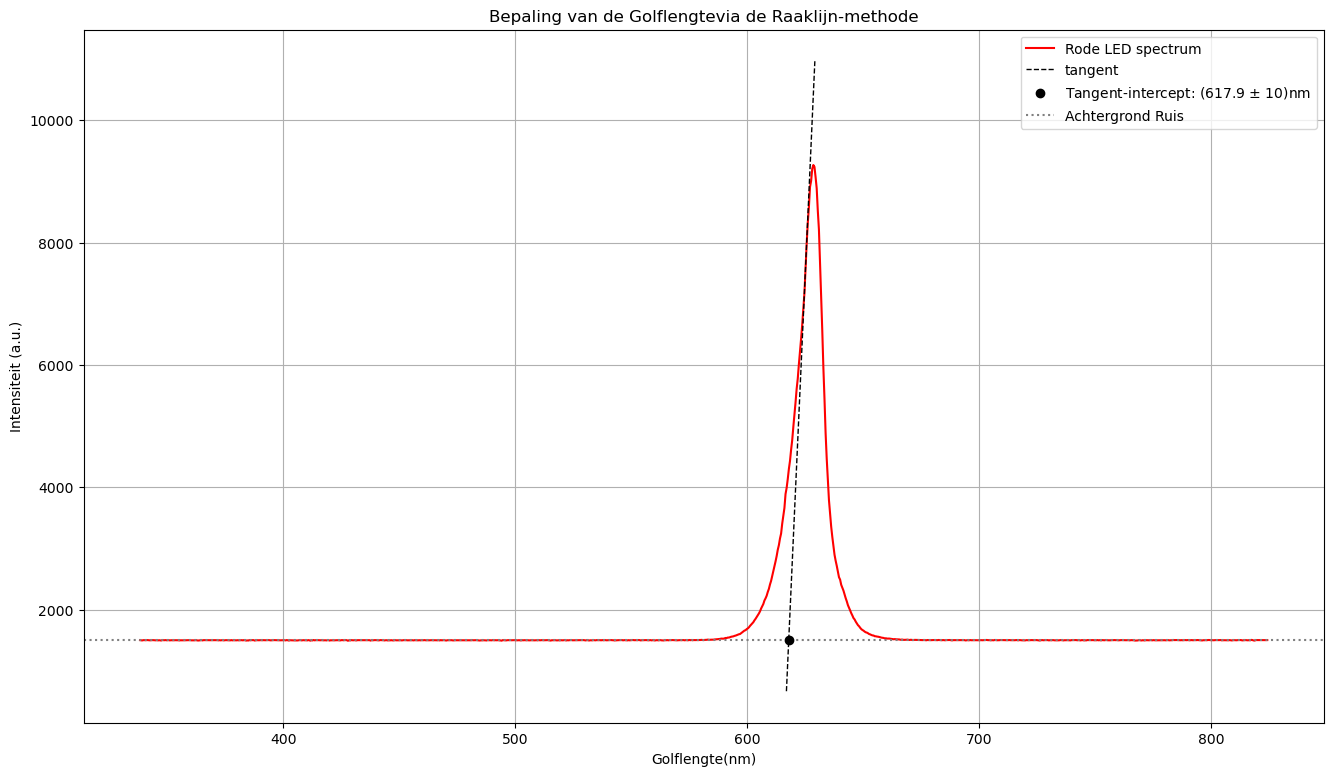

In [180]:
# Rode LED
redled_peak, redled_golflengte, redled_x, redled_y, redled_m, redled_correctie = led_golflengte(redled_lambda)
grafiek_lambda(redled_lambda, 'Rode', 'red', redled_golflengte, redled_x, redled_y, redled_m, redled_correctie)

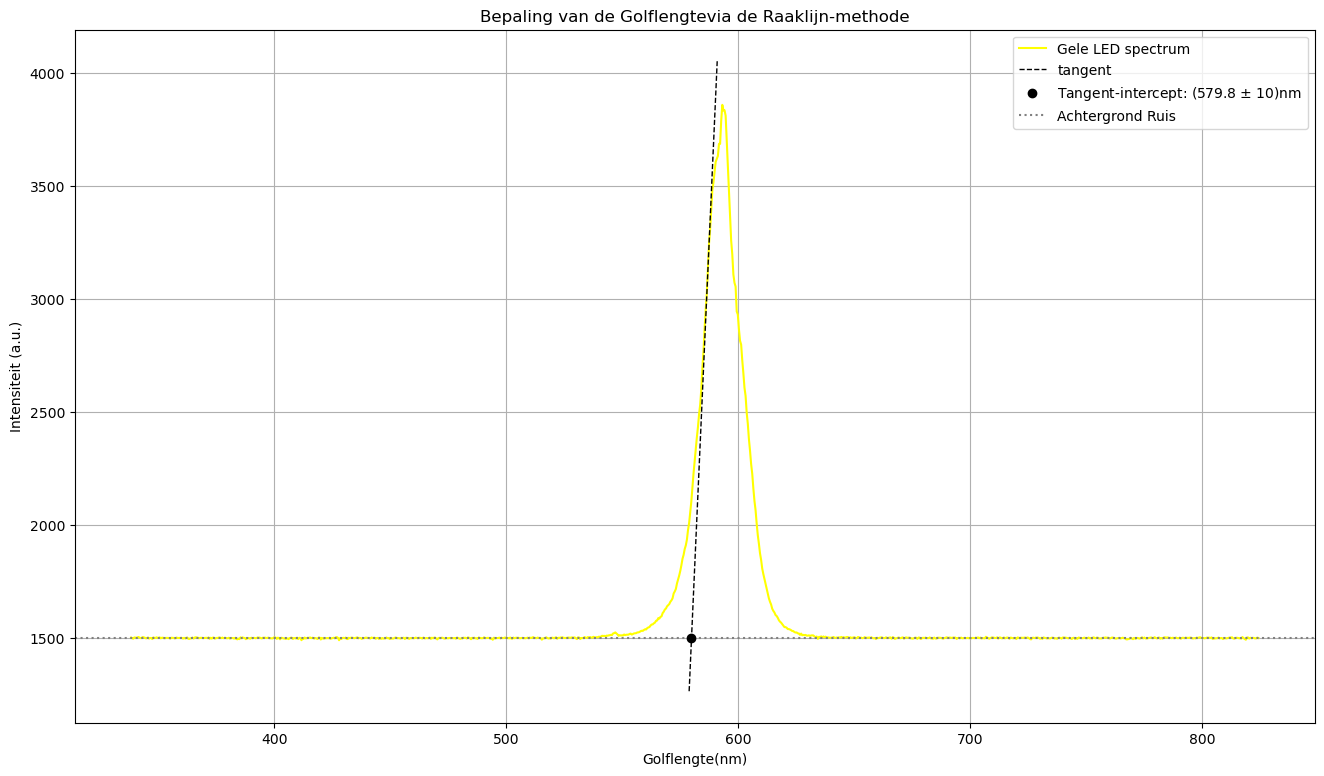

In [181]:
# Gele LED
yellowled_peak, yellowled_golflengte, yellowled_x, yellowled_y, yellowled_m, yellowled_correctie = led_golflengte(yellowled_lambda)
grafiek_lambda(yellowled_lambda, 'Gele', 'yellow', yellowled_golflengte, yellowled_x, yellowled_y, yellowled_m, yellowled_correctie)

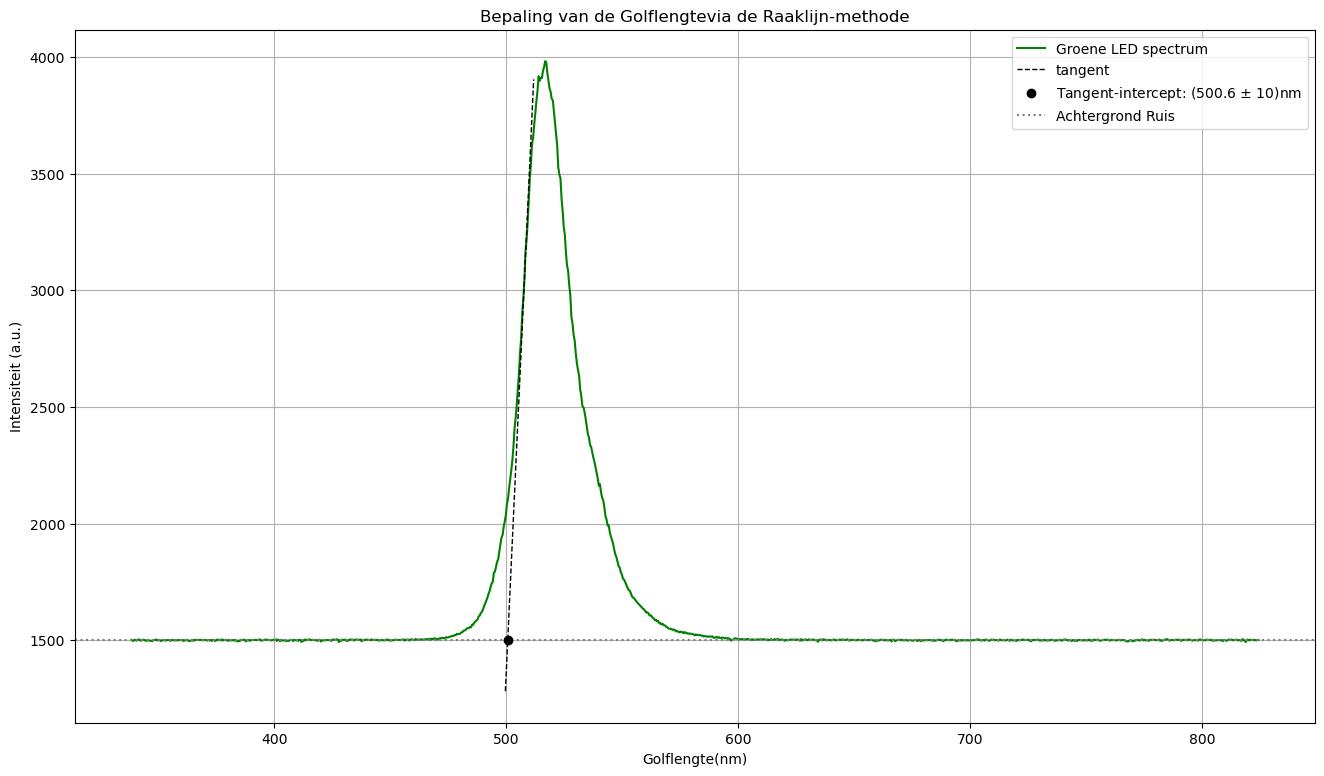

In [182]:
# Groene LED
greenled_peak, greenled_golflengte, greenled_x, greenled_y, greenled_m, greenled_correctie = led_golflengte(greenled_lambda)
grafiek_lambda(greenled_lambda, 'Groene', 'green', greenled_golflengte, greenled_x, greenled_y, greenled_m, greenled_correctie)

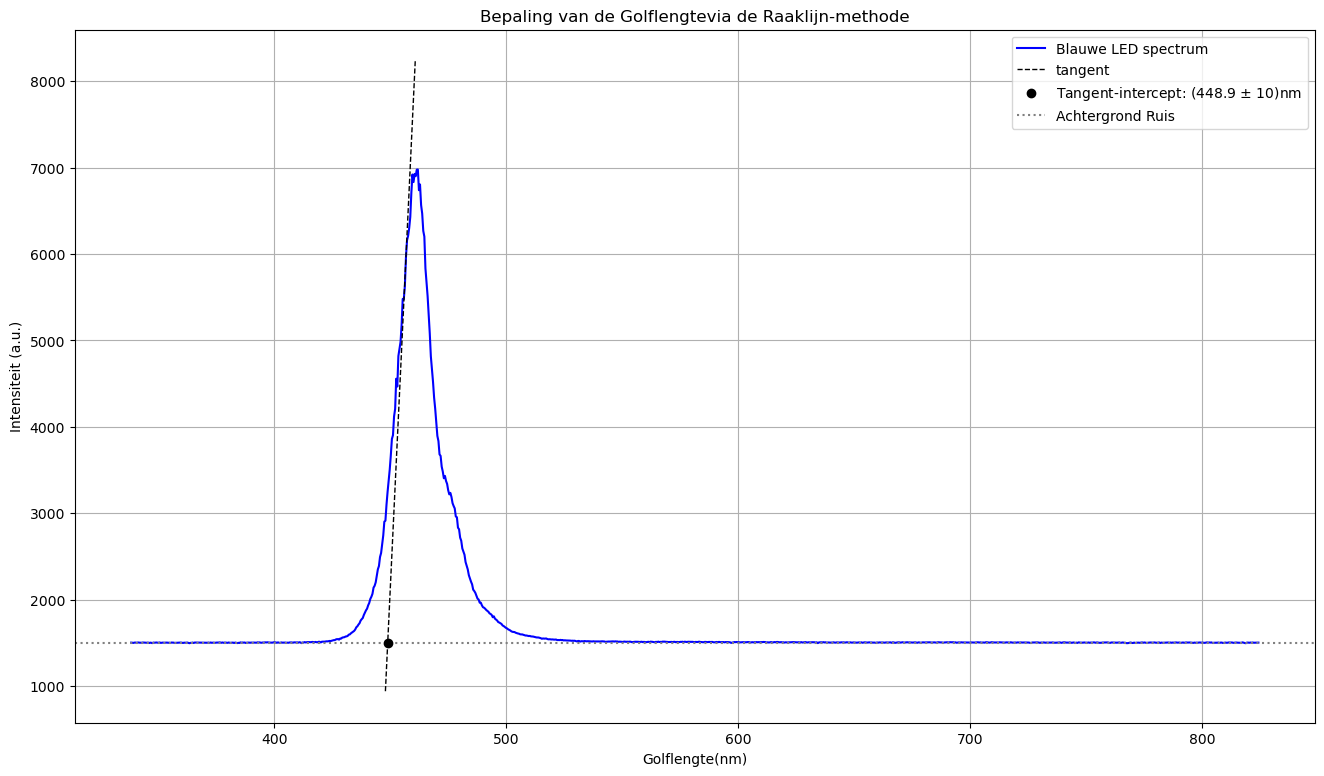

In [183]:
# Blauwe LED
blueled_peak, blueled_golflengte, blueled_x, blueled_y, blueled_m, blueled_correctie = led_golflengte(blueled_lambda)
grafiek_lambda(blueled_lambda, 'Blauwe', 'blue', blueled_golflengte, blueled_x, blueled_y, blueled_m, blueled_correctie)

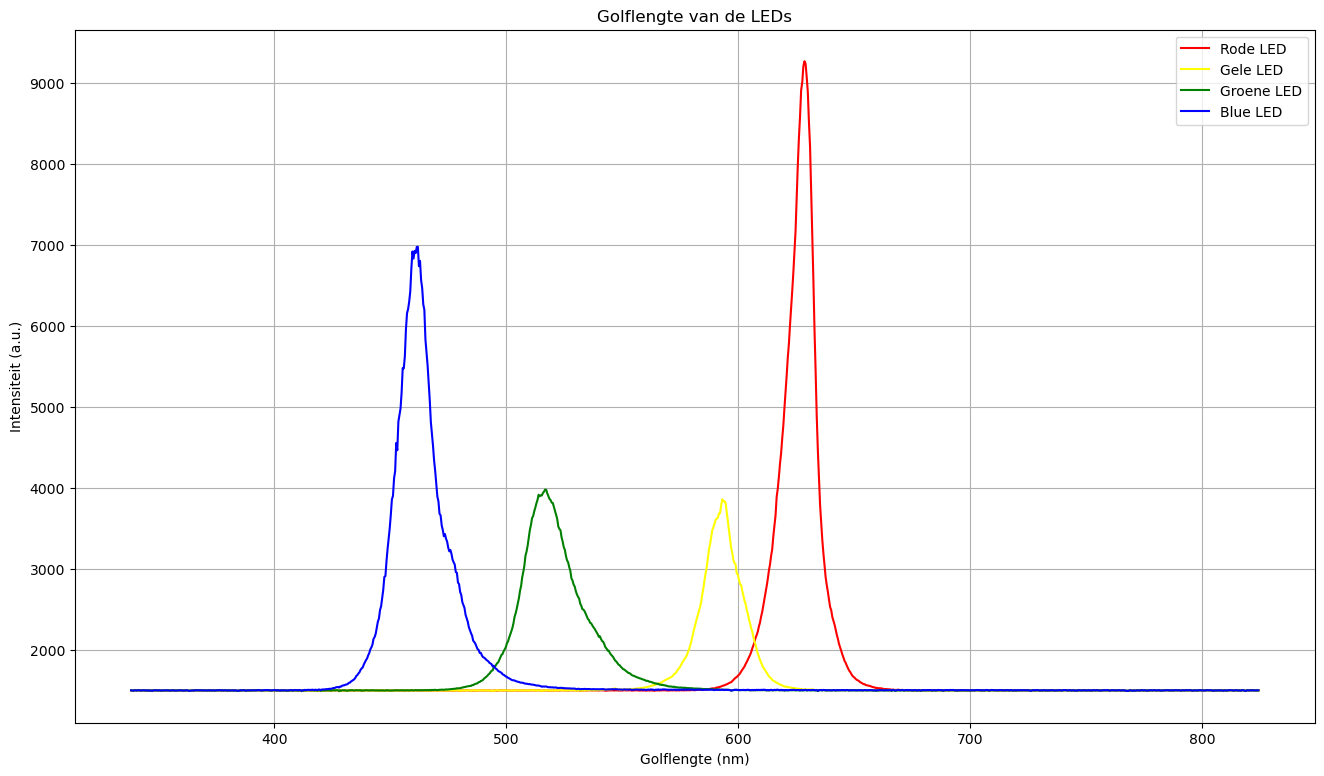

In [184]:
# alle kleuren samen
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(redled_lambda['golflengte'], redled_lambda['intensiteit'], color='red', label='Rode LED')
ax.plot(yellowled_lambda['golflengte'], yellowled_lambda['intensiteit'], color='yellow', label='Gele LED')
ax.plot(greenled_lambda['golflengte'], greenled_lambda['intensiteit'], color='green', label='Groene LED')
ax.plot(blueled_lambda['golflengte'], blueled_lambda['intensiteit'], color='blue', label='Blue LED')

plt.title('Golflengte van de LEDs')
plt.xlabel('Golflengte (nm)')
plt.ylabel('Intensiteit (a.u.)')
plt.legend()
plt.grid()
plt.savefig('PPT/golflengtes.png')
plt.show()

In [157]:
c = constants.c
elec = constants.elementary_charge
def planckconstante(golflengte, voltage):
    return float(golflengte) * float(voltage) * elec * 10**-9/ c

In [158]:
constantes = []
accuraat = []
for kleur in range(len(lambdas)):
    planck = planckconstante(lambdas[kleur], voltages[kleur][0])
    constantes.append(planck)
    accuraat.append(round(planck / (6.626 * 10**-34), 2)*100)

In [159]:
planck = sum(constantes)/4 # neem gemiddelde
percentage = round(planck / (6.626*10**-34), 3)*100 # neem gemiddelde

In [160]:
print(f'De Planck-Constante is: {(planck)*10**34:.3f}e-34Js. Het komt {percentage}% overeen met de echte waarde')

De Planck-Constante is: 6.504e-34Js. Het komt 98.2% overeen met de echte waarde


In [161]:
# Definieer de onzekerheid voor de golflengte
u_lambda = 10.0 

def bereken_planck_met_fout(lambda_val, u_lambda, v_val, u_v):
    # h = (e * V * lambda) / c
    # Let op: lambda is in nm, dus we doen * 10^-9
    h = (elec * v_val * (lambda_val * 1e-9)) / c
    
    # Relatieve fouten kwadratisch optellen: 
    # u(h)/h = sqrt( (u(V)/V)^2 + (u(lambda)/lambda)^2 )
    rel_fout_v = u_v / v_val
    rel_fout_l = u_lambda / lambda_val
    u_h = h * np.sqrt(rel_fout_v**2 + rel_fout_l**2)
    
    return h, u_h


constantes_h = []
onzekerheden_h = []
overeenkomst = []

# voltages[kleur] is [waarde, onzekerheid]
# lambdas[kleur] is de waarde van de golflengte (intercept)

for i in range(len(lambdas)):
    v_meting = voltages[i][0]
    u_v_meting = voltages[i][1]
    l_meting = lambdas[i]
    
    # Gebruik de nieuwe functie
    h_berekend, u_h_berekend = bereken_planck_met_fout(l_meting, u_lambda, v_meting, u_v_meting)
    
    constantes_h.append(h_berekend)
    onzekerheden_h.append(u_h_berekend)
    
    # Bereken hoe dicht het bij de echte waarde ligt
    ratio = (h_berekend / h_lit) * 100
    overeenkomst.append(ratio)

# 3. Gemiddelde en eindresultaat
h_gem = np.mean(constantes_h)
# De onzekerheid in het gemiddelde (gecombineerd)
u_h_gem = np.sqrt(np.sum(np.array(onzekerheden_h)**2)) / len(onzekerheden_h)

print(f"--- Resultaten ---")
kleuren = ['Rood', 'Geel', 'Groen', 'Blauw']
for i, kleur in enumerate(kleuren):
    print(f"{kleur}: h = {constantes_h[i]:.3e} ± {onzekerheden_h[i]:.3e} Js ({overeenkomst[i]:.1f}% van literatuur)")

print(f"\nGemiddelde h = {h_gem:.3e} ± {u_h_gem:.3e} Js")
afwijking = abs(h_gem - h_lit) / h_lit * 100
print(f"Afwijking t.o.v. literatuurwaarde: {afwijking:.2f}%")

--- Resultaten ---
Rood: h = 6.277e-34 ± 1.939e-35 Js (94.7% van literatuur)
Geel: h = 6.430e-34 ± 2.165e-35 Js (97.0% van literatuur)
Groen: h = 6.780e-34 ± 1.904e-35 Js (102.3% van literatuur)
Blauw: h = 6.530e-34 ± 2.046e-35 Js (98.6% van literatuur)

Gemiddelde h = 6.504e-34 ± 1.008e-35 Js
Afwijking t.o.v. literatuurwaarde: 1.84%


1.217000738529058e-06 0.005340764549933041


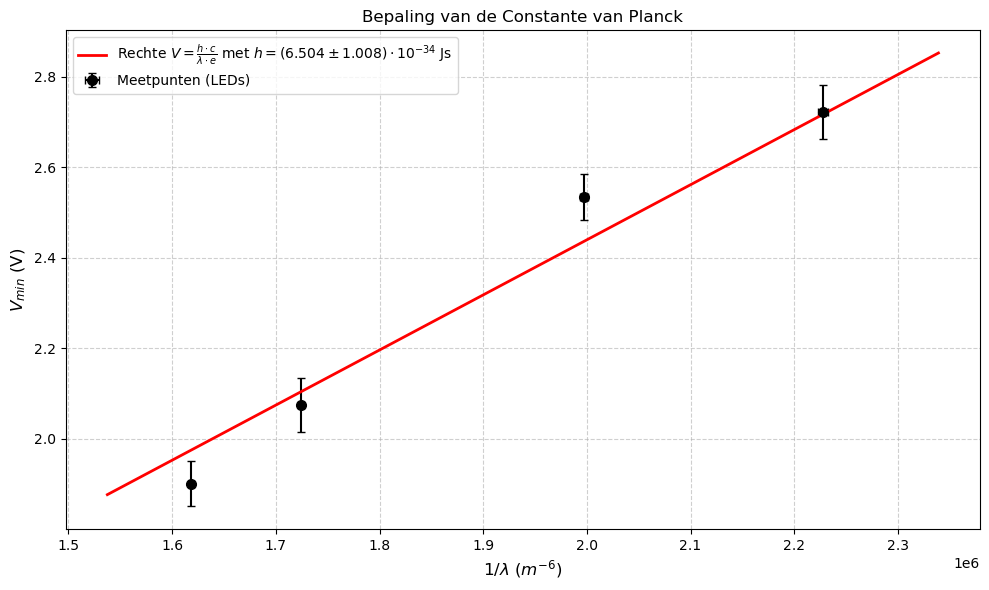

In [174]:
x_lambda = np.array(lambdas) * 1e-9  # Omzetten naar meters
y_volt = np.array([v[0] for v in voltages])
u_y_volt = np.array([v[1] for v in voltages])

# x-as is 1/lambda
x_inv_lambda = 1 / x_lambda

# Onzekerheid op 1/lambda berekenen (foutenvoortplanting)
# We nemen een onzekerheid in golflengte van u_L = 2 nm aan
u_L = u_lambda ** -9
u_x_inv = u_L / (x_lambda**2)

# 3. De lijn tekenen met m = 6.504 * 10^-34
# De helling van de grafiek (V vs 1/L) is (h * c) / e
h_doel = 6.504e-34
helling = (h_doel * c) / e

# We berekenen de intercept (b) zodat de lijn mooi door het midden van je data gaat
intercept = np.mean(y_volt) - helling * np.mean(x_inv_lambda)

# 4. De Grafiek maken
plt.figure(figsize=(10, 6))

# Teken de meetpunten met foutbalken
plt.errorbar(x_inv_lambda, y_volt, xerr=u_x_inv, yerr=u_y_volt, 
             fmt='o', color='black', label='Meetpunten (LEDs)', 
             capsize=3, markersize=7)

# Teken de rechte lijn
x_lijn = np.linspace(min(x_inv_lambda)*0.95, max(x_inv_lambda)*1.05, 100)
y_lijn = helling * x_lijn + intercept
print(helling, intercept)
plt.plot(x_lijn, y_lijn, 'r-', linewidth=2, 
         label=rf'Rechte $V = \frac{{h \cdot c}}{{\lambda \cdot e}}$ met $h = (6.504 \pm 1.008) \cdot 10^{{-34}} \text{{ Js}}$')
# Opmaak van de grafiek
plt.xlabel(r'$1/\lambda$ ($m^{-6}$)', fontsize=12)
plt.ylabel(r'$V_{min}$ (V)', fontsize=12)
plt.title('Bepaling van de Constante van Planck')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.savefig('PPT/Bepalingh.png')
plt.show()